# **EMAIL SPAM DETECTION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
df=pd.read_csv('/content/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [2]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.shape

(5572, 2)

In [5]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [6]:
df.dtypes

Category    object
Message     object
dtype: object

In [7]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [9]:
#assigning numerical value for subcategorical data
df['Category']=df['Category'].map({'ham':1,'spam':0})
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Category', ylabel='count'>

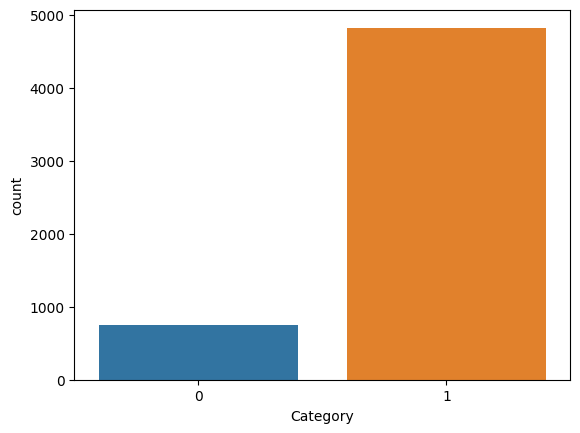

In [10]:
sns.countplot(x='Category',data=df)

In [11]:
#downloading the subpackages required
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
#assigning the target column ina varriable
msg=df.Message

In [13]:
#removing spl characters
import re
msg=msg.str.replace('[^a-zA-Z0-9]+',' ')
msg

<ipython-input-13-fddf74690249>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+',' ')


0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                   Will b going to esplanade fr home 
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: Message, Length: 5572, dtype: object

In [14]:
from nltk.tokenize import word_tokenize
word=word_tokenize('english')

In [15]:
#stemming and tokenization
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
msg=msg.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [16]:
#removing stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
msg

0       go jurong point crazi avail onli bugi n great ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [17]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(msg)
data

<5572x7228 sparse matrix of type '<class 'numpy.float64'>'
	with 47670 stored elements in Compressed Sparse Row format>

In [18]:
y=df['Category'].values
y

array([1, 1, 0, ..., 1, 1, 1])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9001196172248804
              precision    recall  f1-score   support

           0       1.00      0.25      0.41       224
           1       0.90      1.00      0.95      1448

    accuracy                           0.90      1672
   macro avg       0.95      0.63      0.68      1672
weighted avg       0.91      0.90      0.87      1672



In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
grd=GradientBoostingClassifier()
from sklearn.naive_bayes import MultinomialNB
multi=MultinomialNB()
ls=[ada,grd,multi]

Model: AdaBoostClassifier()
0.9784688995215312
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       224
           1       0.98      1.00      0.99      1448

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

Model: GradientBoostingClassifier()
0.9748803827751196
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       224
           1       0.97      1.00      0.99      1448

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.97      0.97      1672

Model: MultinomialNB()
0.9671052631578947
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       224
           1       0.96      1.00      0.98      1448

    accuracy                          

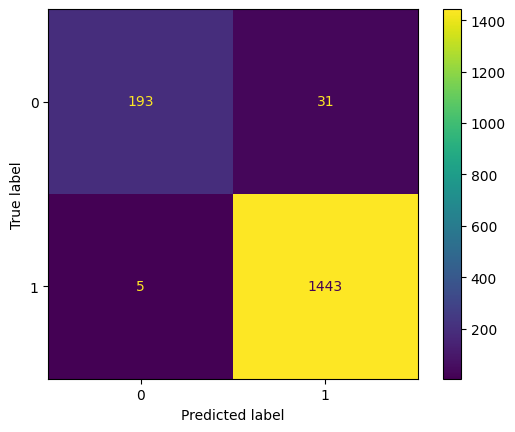

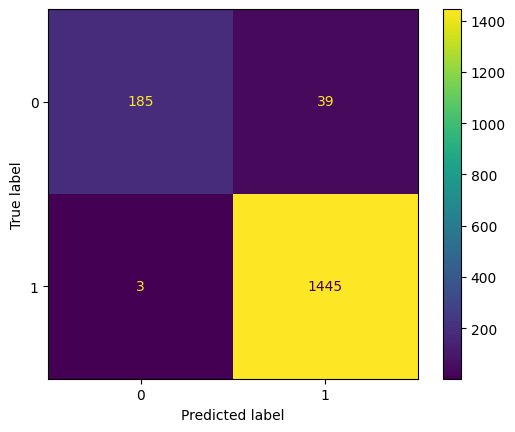

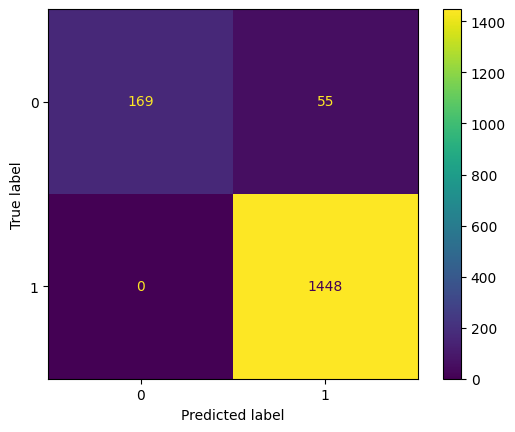

In [23]:
for i in ls:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(f'Model: {i}')
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))